In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

### 1. Importing Application_data csv file

In [3]:
#Importing and reading the application_data database into a variable called App_data
App_data = pd.read_csv("application_data.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
App_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2. Checking the Structure of the data

In [4]:
# Describing the dataframe
App_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
# Using the shape to determine number of rows and columns present in a dataframe
App_data.shape

(307511, 122)

In [6]:
# Using info function to know datatypes and column count
App_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 3. Quality Check and Missing values

#### a. Finding the percentage of missing values of all the columns

In [7]:
# Percentage of missing values in all columns
100*(App_data.isnull().sum()/len(App_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### b. Removing the columns with high missing value percentage

In [8]:
#Displaying columns that have more than 50% missing values.
df=list(App_data.columns[100*(App_data.isnull().sum()/len(App_data.index))>=50])
df

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [9]:
#Dropping all the columns with more than 50% missing values from the main data frame.
App_data.drop(df,axis = 1,inplace=True)
App_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Checking the shape of the dataframe after column elimination
App_data.shape

(307511, 81)

In [11]:
# describing the data frame
App_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0

#### c. Finding columns with missing percentage around 13% for imputation.


In [12]:
#Checking for the columns which can be imputed.
100*(App_data.isnull().sum()/len(App_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [13]:
# 1.Analysing AMT_REQ_CREDIT_BUREAU_DAY column.
print('Total count of missing values in the column AMT_REQ_CREDIT_BUREAU_DAY:')
print(App_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum())
print('Value counts of the column AMT_REQ_CREDIT_BUREAU_DAY:')
print(App_data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True))

Total count of missing values in the column AMT_REQ_CREDIT_BUREAU_DAY:
41519
Value counts of the column AMT_REQ_CREDIT_BUREAU_DAY:
0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [14]:
# As per the above observation the column, 'AMT_REQ_CREDIT_BUREAU_DAY', has categorical data.
# Hence, we can impute the missing values with "Mode".
print('This column is a categorical type. Hence, we can use the Mode value to impute the missing values, that is - {0}'.format(App_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])) 

This column is a categorical type. Hence, we can use the Mode value to impute the missing values, that is - 0.0


#### AMT_REQ_CREDIT_BUREAU_DAY column is a categorical type. Hence, we can use the Mode value to impute the missing values

In [15]:
# 2. Analysing AMT_REQ_CREDIT_BUREAU_HOUR column.
print('Total count of missing values in the column AMT_REQ_CREDIT_BUREAU_HOUR:')
print(App_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum())
print('Value counts of the column AMT_REQ_CREDIT_BUREAU_HOUR:')
print(App_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True))

Total count of missing values in the column AMT_REQ_CREDIT_BUREAU_HOUR:
41519
Value counts of the column AMT_REQ_CREDIT_BUREAU_HOUR:
0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


In [16]:
# As per the above observation the column, 'AMT_REQ_CREDIT_BUREAU_HOUR', has categorical data.
# Hence, we can impute the missing values with "Mode".
print('This column is a categorical type. Hence, we can use the Mode value to impute the missing values, that is - {0}'.format(App_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])) 

This column is a categorical type. Hence, we can use the Mode value to impute the missing values, that is - 0.0


#### AMT_REQ_CREDIT_BUREAU_HOUR column is a categorical type. Hence, we can use the Mode value to impute the missing values

Column FLOORSMAX_AVG detailed description:
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


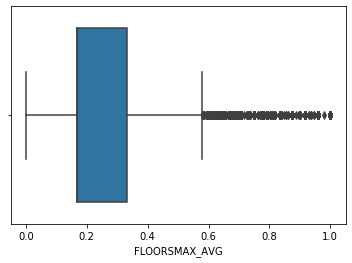

In [17]:
# 3. Analysing FLOORSMAX_AVG column
print('Column FLOORSMAX_AVG detailed description:')
print(App_data.FLOORSMAX_AVG.describe())
sns.boxplot(App_data.FLOORSMAX_AVG)

In [18]:
# As per the above observation the column, 'FLOORSMAX_AVG', has Continuous data with outliers.
# Hence, we can impute the missing values with "Median".
print('We can use the Median value to impute the missing values, that is - {0}'.format(App_data.FLOORSMAX_AVG.median())) 


We can use the Median value to impute the missing values, that is - 0.1667


#### FLOORSMAX_AVG column is a Continuous column. We can use the Median value to impute the missing values

Column TOTALAREA_MODE detailed description:
count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


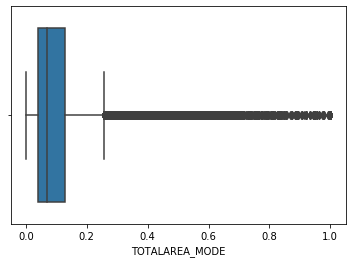

In [19]:
# 4. Analysing TOTALAREA_MODE column
print('Column TOTALAREA_MODE detailed description:')
print(App_data.TOTALAREA_MODE.describe())
sns.boxplot(App_data.TOTALAREA_MODE)


In [20]:
# As per the above observation the column, 'TOTALAREA_MODE', has Continuous data with outliers.
# Hence, we can impute the missing values with "Median".
print('We can use the Median value to impute the missing values, that is - {0}'.format(App_data.TOTALAREA_MODE.median())) 


We can use the Median value to impute the missing values, that is - 0.0688


#### TOTALAREA_MODE column is a continuous column. We can use the Median value to impute the missing values

Column EXT_SOURCE_3 detailed description:
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


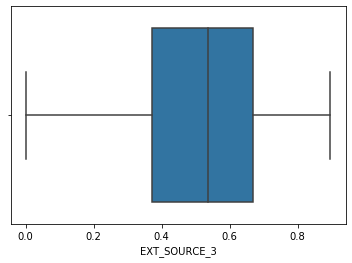

In [21]:
# 5. Analysing EXT_SOURCE_3 column
print('Column EXT_SOURCE_3 detailed description:')
print(App_data.EXT_SOURCE_3.describe())
sns.boxplot(App_data.EXT_SOURCE_3)

In [22]:
# As per the above observation the column, 'EXT_SOURCE_3', has Continuous data with no outliers.
# Hence, we can impute the missing values with "Mean".
print('We can use the Mean value to impute the missing values, that is - {0}'.format(App_data.EXT_SOURCE_3.mean())) 


We can use the Mean value to impute the missing values, that is - 0.5108529061800121


#### EXT_SOURCE_3 column is a continuous column. Since it does not have outliers we can use the Mean value to impute the missing values

Column EXT_SOURCE_2 detailed description:
count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


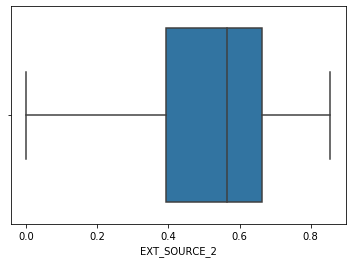

In [23]:
# 6. Analysing EXT_SOURCE_2 column
print('Column EXT_SOURCE_2 detailed description:')
print(App_data.EXT_SOURCE_2.describe())
sns.boxplot(App_data.EXT_SOURCE_2)

In [24]:
# As per the above observation the column, 'EXT_SOURCE_2', has Continuous data with no outliers.
# Hence, we can impute the missing values with "Mean".
print('We can use the Mean value to impute the missing values, that is - {0}'.format(App_data.EXT_SOURCE_2.mean())) 


We can use the Mean value to impute the missing values, that is - 0.5143926741308463


#### EXT_SOURCE_2 column is a continuous column. Since it does not have outliers we can use the Mean value to impute the missing values

#### d. Checking the datatypes of all the columns and changing the data type wherever it is required

In [25]:
# Using info to find the datatypes of each column
App_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [26]:
# Selecting categorical columns to update. 
keep_cols_T1 = [c for c
        in list(App_data)
        if len(App_data[c].unique()) < 20]
len(keep_cols_T1)

55

In [27]:
# Making the changes in the data type. 
App_data[keep_cols_T1] = App_data[keep_cols_T1].astype(object)
App_data.dtypes.sort_values()
App_data.select_dtypes(include = ['object']).shape

(307511, 56)

#### 5. For numercial columns checking for outliers and reporting them for the below 5 variables.

#### Variable -1 REGION_POPULATION_RELATIVE

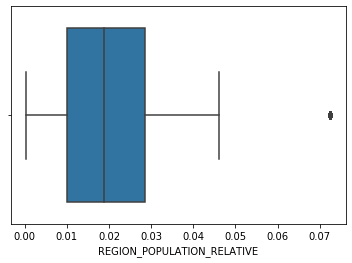

In [28]:
# Plotting box plot for REGION_POPULATION_RELATIVE
sns.boxplot(App_data.REGION_POPULATION_RELATIVE)

In [29]:
# Describing REGION_POPULATION_RELATIVE
App_data.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

#### REGION_POPULATION_RELATIVE has outiers as observed from the above boxplot, this column represents the Normalized population of region where client lives (higher number means the client lives in more populated region), So we cannot remove this outlier indicates the client lives in a highly populated region  

#### Variable-2: AMT_INCOME_TOTAL

In [30]:
# Describing AMT_INCOME_TOTAL
print(App_data.AMT_INCOME_TOTAL.describe())
print(App_data.shape)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
(307511, 81)


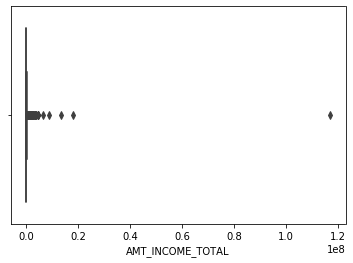

In [31]:
# Plotting box plot for AMT_INCOME_TOTAL
sns.boxplot(App_data.AMT_INCOME_TOTAL)

#### Income of clients may vary from one another, so we cannot exclude this outlier since it may happen that one client's income is more than the other client

#### Variable-3: AMT_GOODS_PRICE

In [32]:
# Describing AMT_GOODS_PRICE
App_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

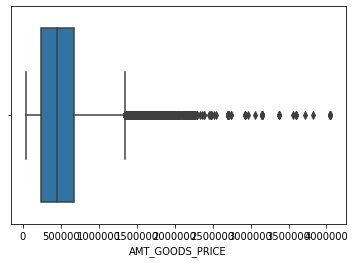

In [33]:
# Plotting box plot for AMT_GOODS_PRICE 
sns.boxplot(App_data.AMT_GOODS_PRICE)

#### It is the price of goods for which the loan is given, so we cannot remove the outliers as the goods prices can vary from each other by n amount.

#### Variable-4: DAYS_LAST_PHONE_CHANGE

In [34]:
# Making absolute values 
App_data[['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','DAYS_BIRTH']] = (App_data[['DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','DAYS_BIRTH']]).abs()

In [35]:
# Describing DAYS_LAST_PHONE_CHANGE
App_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

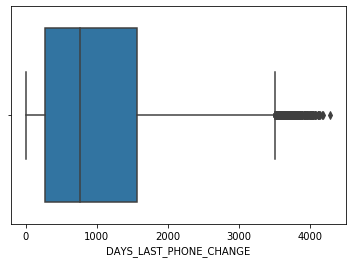

In [36]:
# Plotting box plot for DAYS_LAST_PHONE_CHANGE
sns.boxplot(App_data.DAYS_LAST_PHONE_CHANGE)

#### We cannot remove the outliers from this(DAYS_LAST_PHONE_CHANGE) column since the client can change the phone any number of days before submitting the application

#### Variable-5: DAYS_REGISTRATION

In [37]:
#Describing DAYS_REGISTRATION
App_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

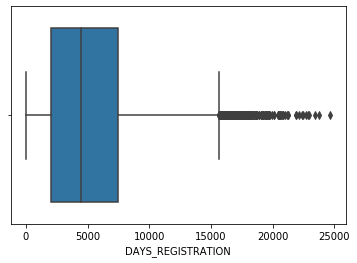

In [38]:
# Plotting box plot for DAYS_REGISTRATION
sns.boxplot(App_data.DAYS_REGISTRATION)

#### We cannot remove the outliers from this(DAYS_REGISTRATION) column since the client can change the registration any number of days before submitting the application

#### f. Binning of continuous variable

In [39]:
# Variable 1: AMT_INCOME_TOTAL
App_data['binned_AMT_INCOME'] = pd.qcut(App_data['AMT_INCOME_TOTAL'], q=4,labels=['Low', 'Average','Good','High'], precision=0)
App_data['binned_AMT_INCOME'].value_counts()

Low        100578
Good        82213
High        71538
Average     53182
Name: binned_AMT_INCOME, dtype: int64

#### We have divided the AMT_INCOME_TOTAL column into 4 quantiles with labels=['Low', 'Average','Good','High'] 

In [40]:
# Variable 2: AMT_GOODS_PRICE
App_data['binned_AMT_GOODS_PRICE'] = pd.qcut(App_data['AMT_GOODS_PRICE'], q=3,labels=['Low','Medium','High'], precision=0)
App_data['binned_AMT_GOODS_PRICE'].value_counts()


Medium    122992
Low       103879
High       80362
Name: binned_AMT_GOODS_PRICE, dtype: int64

#### We have divided the AMT_GOODS_PRICE column into 3 quantiles with labels=['Low','Medium','High'] 

### 4. ANALYSIS

#### a. Calculating the Imbalance Percentage for target variable

In [41]:
#calculating inbalance percentage
100*App_data.TARGET.value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### b. Dividing the main dataframe into 2 sub dataframes i.e., Target = 1(T1) and Target = 0(T0)

In [42]:
# Creating T1 dataframe
T1 = App_data.loc[App_data['TARGET']==1]
T1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,binned_AMT_INCOME,binned_AMT_GOODS_PRICE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,-637,3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2,2.0,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1.0,Good,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724.0,-2628,6573.0,-1827,1,1,0,1,0,0,Cooking staff,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1,10.0,0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,2,2.0,Low,High
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482.0,-1262,1182.0,-1029,1,1,0,1,0,0,Laborers,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0,0.0,0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0,4.0,Good,High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384.0,-3597,45.0,-4409,1,1,1,1,1,0,Sales staff,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0,1.0,0,1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2.0,Average,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794.0,365243,5391.0,-4199,1,0,0,1,0,0,NaN,2,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,1.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / se

In [43]:
# Creating T0 dataframe
T0 = App_data.loc[App_data['TARGET']==0]
T0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,binned_AMT_INCOME,binned_AMT_GOODS_PRICE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,-1188,1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0,1.0,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,High,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,-225,4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,-3039,9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,2.0,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Average,Medium
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932.0,-3038,4311.0,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,Average,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941.0,-1588,4970.0,-477,1,1,1,1,1,0,Laborers,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1.0,Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,24384.0,

#### c. Univariate-Analysis

#### Categorical Variable

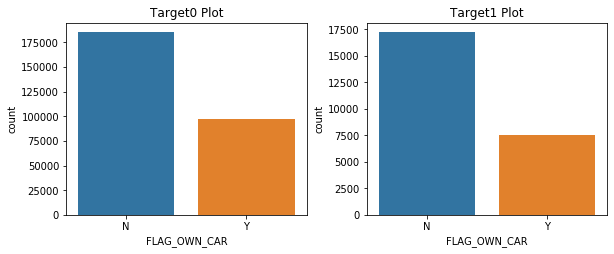

In [44]:
#Univariate - Categorical plot

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_CAR',data=T0)
plt.title('Target0 Plot')
plt.tight_layout(pad=6.0)
plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_CAR',data=T1)
plt.title('Target1 Plot')

plt.show()

#### Non defaulted clients(Target=0) with no car(x=N) are more in number compared to the customers who are defaulted(Target=1)
#### Majority of the Non defaulted clients(Target=0) own a car(x=Y) in comparison to the defaulted customers(Target=1).


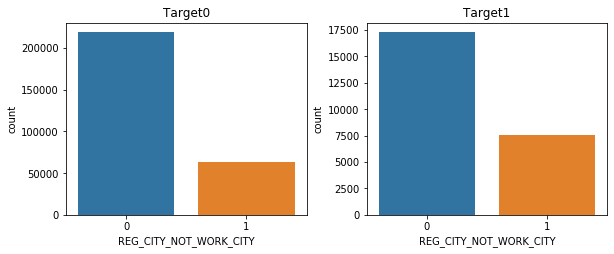

In [45]:
# Univariate - Categorical Variable 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='REG_CITY_NOT_WORK_CITY',data=T0)
plt.title('Target0')
plt.tight_layout(pad=6.0)
plt.subplot(1,2,2)
sns.countplot(x='REG_CITY_NOT_WORK_CITY',data=T1)
plt.title('Target1')
plt.show()

#### Number of people who are not defaulted (Target =0) have high number of cases where client's work address and permanent address are same', as compared to people who have defaulted
#### Similarly we can also observe that the people who stay in different city and are not defaulted are still higher in number than defaulted customers in different cities

#### d. Univariate Continuous variable

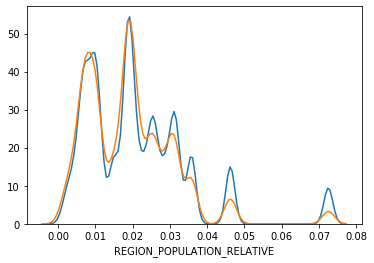

In [46]:
# Univariate continuous variable

sns.distplot(T0.REGION_POPULATION_RELATIVE,hist =False)
sns.distplot(T1.REGION_POPULATION_RELATIVE,hist =False)

#### As the density of the population increases the number of defaulted clients are lesser compared to non-defaulted clients 

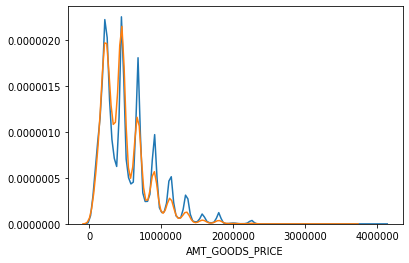

In [47]:
# Univariate continuous variable

sns.distplot(T0.AMT_GOODS_PRICE, hist=False)
sns.distplot(T1.AMT_GOODS_PRICE, hist=False)

#### For goods price ranging from low to high, defaulted customers are lesser in comparison to non-defaulted customers

#### e. Bivariate Analysis

Text(0, 0.5, 'AMT_ANNUITY')

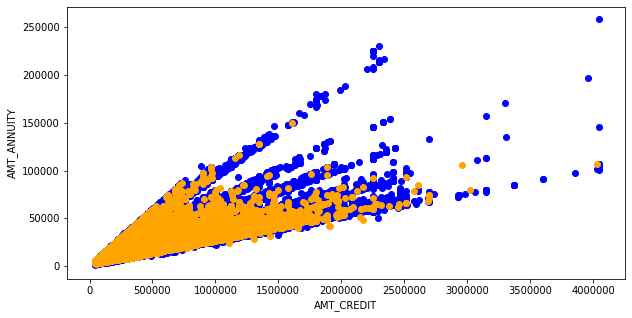

In [48]:
# 1. Continuous - Continuous
plt.figure(figsize=(10,5))
plt.scatter(x=T0['AMT_CREDIT'],y=T0['AMT_ANNUITY'], color = 'blue')
plt.scatter(x=T1['AMT_CREDIT'],y=T1['AMT_ANNUITY'], color = 'orange')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

#### Loan annuity growth is proportional to credit amount of the loan in majority of the cases against the defaulted and non- defaulted clients.

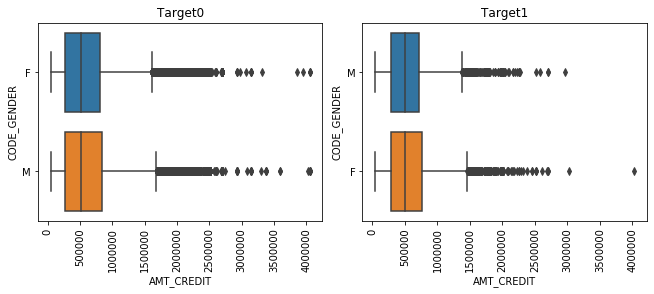

In [49]:
# 2. Categorical - Continuous

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data =T0, x='AMT_CREDIT',y=T0.CODE_GENDER.replace("XNA", np.nan).dropna())
plt.title('Target0')
plt.xticks(rotation=90)
plt.tight_layout(pad=4.0)
plt.subplot(1,2,2)
sns.boxplot(data =T1, x='AMT_CREDIT', y ='CODE_GENDER')
plt.title('Target1')
plt.xticks(rotation=90)
plt.show()


#### Credit amount of the loan is equal for both male and female non-defaulted customers. 
#### Defaulted female customers have a higher credit amount of the loan than defaulted male customers.
#### Non defaulted customers have higher credit amount of the loan than the defaulted customers.

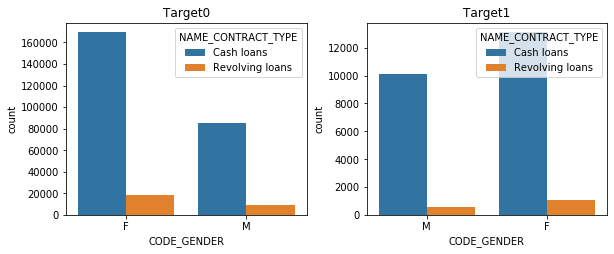

In [50]:
# 3. Categorical - Categorical
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=T0.CODE_GENDER.replace("XNA", np.nan).dropna(),hue='NAME_CONTRACT_TYPE',data=T0)
plt.title('Target0')
plt.tight_layout(pad=6.0)
plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER',hue='NAME_CONTRACT_TYPE',data=T1)
plt.title('Target1')
plt.show()

#### There are more number of Female customers who have taken cash loans and Revolving loans compared to Male customers in both cases (i.e., Non-Defaulted and Defaulted)

#### f. Finding correlation for numerical variables

In [51]:
# Storing only continuous variables in T0
keep_cols = [c for c in list(T0) if len(T0[c].unique()) > 25]
T0 = T0[keep_cols]
T0.drop(['ORGANIZATION_TYPE'], inplace = True, axis =1)
print(T0.shape)
T0.head()

(282686, 22)


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765.0,-1188,1186.0,-291,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,1.0,828.0
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,19046.0,-225,4260.0,-2531,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,815.0
3,100006,135000.0,312682.5,29686.5,297000.0,0.008019,19005.0,-3039,9833.0,-2437,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,617.0
4,100007,121500.0,513000.0,21865.5,513000.0,0.028663,19932.0,-3038,4311.0,-3458,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1106.0
5,100008,99000.0,490495.5,27517.5,454500.0,0.035792,16941.0,-1588,4970.0,-477,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2536.0


In [52]:
# Finding the correlation.
corr_matrix0 = T0.corr()
corr_matrix0

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,-0.000077,0.001589,0.000309,0.001202,0.004096,0.001442,0.003747,0.000952,0.003810,0.002040,-0.000695,-0.000741,0.000998
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.141250,-0.064937,0.022896,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.027828,-0.027690,0.041338
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.072515,-0.013477,-0.001464,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000914,-0.000892,0.069540
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.106425,-0.039436,0.014113,0.126615,0.028051,0.014059,0.130944,0.013588,0.127014,0.013679,0.129959,0.090966,-0.013091,-0.012893,0.062013
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.071051,-0.015916,-0.003649,0.135694,0.038908,0.006982,0.107686,0.005875,0.104693,0.006597,0.107089,0.076616,-0.000707,-0.000723,0.071373
REGION_POPULATION_RELATIVE,0.000360,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.006961,0.052083,-0.001071,0.198493,-0.012486,-0.006282,0.325347,-0.006421,0.306551,-0.006307,0.321077,0.203852,-0.012107,-0.011591,0.041164
DAYS_BIRTH,0.001346,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.618048,0.333151,-0.271314,0.078158,0.197287,-0.001982,-0.007060,-0.001730,-0.006576,-0.002093,-0.007161,-0.005098,-0.007726,-0.007316,0.076510
DAYS_EMPLOYED,0.001744,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,0.618048,1.000000,0.210187,-0.274290,-0.030732,0.108585,0.007778,-0.019984,0.007864,-0.018993,0.007524,-0.020015,-0.018243,0.007252,0.007431,-0.027081
DAYS_REGISTRATION,0.001475,-0.064937,-0.013477,-0.039436,-0.015916,0.052083,0.333151,0.210187,1.000000,-0.100236,0.052503,0.103476,-0.012226,-0.054452,-0.009715,-0.054270,-0.012191,-0.054822,-0.022556,-0.008315,-0.008247,0.053533
DAYS_ID_PUBLISH,-0.000077,0.022896,-0.001464,0.014113,-0.003649,-0.001071,-0.271314,-0.274290,-0.100236,1.000000,-0.041703,-0.124715,-0.003112,-0.007782,-0.002361,-0.008039,-0.002880,-0.007936,-0.009994,-0.012326,-0.012810,-0.082949


In [53]:
# Unstacking the correlated values.
corr_matrix0.unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,AMT_INCOME_TOTAL,0.001739
2,SK_ID_CURR,AMT_CREDIT,-0.000342
3,SK_ID_CURR,AMT_ANNUITY,0.000068
4,SK_ID_CURR,AMT_GOODS_PRICE,-0.000205
...,...,...,...
479,DAYS_LAST_PHONE_CHANGE,FLOORSMAX_MEDI,0.003568
480,DAYS_LAST_PHONE_CHANGE,TOTALAREA_MODE,0.005408
481,DAYS_LAST_PHONE_CHANGE,OBS_30_CNT_SOCIAL_CIRCLE,0.014246
482,DAYS_LAST_PHONE_CHANGE,OBS_60_CNT_SOCIAL_CIRCLE,0.014650


In [54]:
# Finding out the top 10 correlated values for T0.
corr_matrix0 = corr_matrix0.where(np.triu(np.ones(corr_matrix0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_matrix0.columns = ['VARIABLE_1', 'VARIABLE_2', 'CORRELATION']
corr_matrix0.dropna(subset = ['CORRELATION'], inplace = True)
corr_matrix0['CORRELATION'] = round(corr_matrix0['CORRELATION'],2)
corr_matrix0['CORRELATION'] = corr_matrix0['CORRELATION'].abs()
corr0_top10 = corr_matrix0.sort_values('CORRELATION', ascending = False).head(10)
corr0_top10

,VARIABLE_1,VARIABLE_2,CORRELATION
387,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
459,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
389,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
343,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
364,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99
90,AMT_GOODS_PRICE,AMT_CREDIT,0.99
320,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97
366,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
68,AMT_ANNUITY,AMT_CREDIT,0.77


In [55]:
# Storing only continuous variables in T1
keep_cols_T1 = [c for c
        in list(T1)
        if len(T1[c].unique()) > 25]

T1 = T1[keep_cols_T1]
T1.drop(['ORGANIZATION_TYPE'], inplace = True, axis =1)
print(T1.shape)
T1.head()

(24825, 22)


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,9461.0,-637,3648.0,-2120,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,1134.0
26,100031,112500.0,979992.0,27076.5,702000.0,0.018029,18724.0,-2628,6573.0,-1827,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,10.0,10.0,161.0
40,100047,202500.0,1193580.0,35028.0,855000.0,0.025164,17482.0,-1262,1182.0,-1029,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,0.0,0.0,1075.0
42,100049,135000.0,288873.0,16258.5,238500.0,0.007305,13384.0,-3597,45.0,-4409,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1480.0
81,100096,81000.0,252000.0,14593.5,252000.0,0.028663,24794.0,365243,5391.0,-4199,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0


In [56]:
# Finding the correlation.
corr_matrix1 = T1.corr()
corr_matrix1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,0.001254,-0.005151,-0.006342,-0.002539,0.006452,-0.008178,0.005597,0.015976,0.007172,0.013810,0.006142,0.016045,0.006284,-0.009395,-0.009058,-0.002455
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014979,-0.000158,-0.004215,0.007154,-0.015110,0.001642,0.009801,0.001530,0.009299,0.001636,0.009652,0.006451,-0.004709,-0.004616,0.002429
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,-0.000968,0.025854,-0.052329,0.120848,0.077698,0.006840,0.090926,0.000958,0.088606,0.005950,0.090833,0.067370,0.019098,0.019487,0.110851
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.082552,-0.034279,-0.016767,0.116305,0.041415,0.001732,0.107146,-0.002979,0.104314,0.001626,0.105975,0.073045,0.004463,0.005500,0.079870
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.076049,0.135810,0.003587,0.025679,-0.056086,0.131184,0.078754,0.006178,0.097623,0.000319,0.095210,0.005336,0.097508,0.073896,0.019921,0.020385,0.118303
REGION_POPULATION_RELATIVE,0.006301,0.009135,0.069161,0.071690,0.076049,1.000000,0.048190,0.015103,0.056222,-0.015537,0.169751,-0.009810,-0.016963,0.261106,-0.017182,0.244463,-0.017148,0.255584,0.157830,0.006224,0.006793,0.055139
DAYS_BIRTH,0.001254,-0.003096,0.135316,0.014303,0.135810,0.048190,1.000000,0.575097,0.289114,-0.252863,0.108662,0.171621,0.005103,0.030130,0.003255,0.029194,0.005584,0.029406,0.018892,0.005164,0.005391,0.111199
DAYS_EMPLOYED,-0.005151,-0.014979,-0.000968,-0.082552,0.003587,0.015103,0.575097,1.000000,0.188929,-0.226470,-0.001479,0.093842,0.015101,0.021336,0.014537,0.021368,0.015090,0.020590,0.015131,-0.008866,-0.009151,-0.003227
DAYS_REGISTRATION,-0.006342,-0.000158,0.025854,-0.034279,0.025679,0.056222,0.289114,0.188929,1.000000,-0.096833,0.069996,0.086099,-0.001368,-0.002310,-0.001595,-0.003912,-0.001974,-0.002611,0.009428,-0.014104,-0.014522,0.071727
DAYS_ID_PUBLISH,-0.002539,-0.004215,-0.052329,-0.016767,-0.056086,-0.015537,-0.252863,-0.226470,-0.096833,1.000000,-0.059814,-0.128268,-0.001166,-0.012570,0.000154,-0.010607,-0.000899,-0.011664,-0.003562,-0.019968,-0.019594,-0.123951


In [57]:
# Unstacking the correlated values.
corr_matrix1.unstack().reset_index()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,AMT_INCOME_TOTAL,-0.010165
2,SK_ID_CURR,AMT_CREDIT,-0.001290
3,SK_ID_CURR,AMT_ANNUITY,-0.007578
4,SK_ID_CURR,AMT_GOODS_PRICE,-0.001816
...,...,...,...
479,DAYS_LAST_PHONE_CHANGE,FLOORSMAX_MEDI,0.031210
480,DAYS_LAST_PHONE_CHANGE,TOTALAREA_MODE,0.030807
481,DAYS_LAST_PHONE_CHANGE,OBS_30_CNT_SOCIAL_CIRCLE,0.028851
482,DAYS_LAST_PHONE_CHANGE,OBS_60_CNT_SOCIAL_CIRCLE,0.029353


In [58]:
# Finding out the top 10 correlated values for T1.
corr_matrix1 = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_matrix1.columns = ['VARIABLE_1', 'VARIABLE_2', 'CORRELATION']
corr_matrix1.dropna(subset = ['CORRELATION'], inplace = True)
corr_matrix1['CORRELATION'] = round(corr_matrix1['CORRELATION'],2)
corr_matrix1['CORRELATION'] = corr_matrix1['CORRELATION'].abs()
corr1_top10 = corr_matrix1.sort_values('CORRELATION', ascending = False).head(10)
corr1_top10

,VARIABLE_1,VARIABLE_2,CORRELATION
459,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
364,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00
387,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00
343,FLOORSMAX_MODE,FLOORSMAX_AVG,0.99
389,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.99
320,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98
366,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98
90,AMT_GOODS_PRICE,AMT_CREDIT,0.98
68,AMT_ANNUITY,AMT_CREDIT,0.75
91,AMT_GOODS_PRICE,AMT_ANNUITY,0.75


#### g. Checking the variable with highest correlation for both data frames T1 and T0 whether they are same or not.

In [59]:
#Top 10 correlated variables of T0 is not equal to T1
print(corr1_top10.equals(corr0_top10))

False


### 5. Read Previous application data

#### a. Merging the two files - application_data.csv and previous_data.csv

In [60]:
#Importing and reading the Previous_application_data database into a variable called Prev_App_data
Prev_app_data = pd.read_csv("previous_application.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
Prev_app_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [61]:
# Merging the Application data and Previous application data
All_App = pd.merge(App_data,Prev_app_data,how='outer')
All_App

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,binned_AMT_INCOME,binned_AMT_GOODS_PRICE,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.500,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,-637.0,3648.0,-2120.0,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2,2.0,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1.0,Good,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.500,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,-1188.0,1186.0,-291.0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0,1.0,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,High,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.000,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,-225.0,4260.0,-2531.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,Low,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.500,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,-3039.0,9833.0,-2437.0,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,2.0,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
#Checking the shape of the new dataframe All_App
All_App.shape

(1977721, 112)

#### b. Performing Univariate and Bivariate analysis on the newly merged data frame(All_App)

In [63]:
# Checking the value_counts of the NAME_CONTRACT_STATUS column
All_App['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [64]:
# Created a dataframe based on 'NAME_CONTRACT_STATUS' column as reference with its variable 'Approved'
Stat_Approved = All_App.loc[All_App['NAME_CONTRACT_STATUS']=='Approved']

In [65]:
# Created a dataframe based on 'NAME_CONTRACT_STATUS' column as reference with its variable 'Canceled'
Stat_Canceled = All_App.loc[All_App['NAME_CONTRACT_STATUS']=='Canceled']

In [66]:
# Created a dataframe based on 'NAME_CONTRACT_STATUS' column as reference with its 'variable Refused'
Stat_Refused = All_App.loc[All_App['NAME_CONTRACT_STATUS']=='Refused']

In [67]:
# Created a dataframe based on 'NAME_CONTRACT_STATUS' column as reference with its variable 'Unused offer'
Stat_Unused_offer = All_App.loc[All_App['NAME_CONTRACT_STATUS']=='Unused offer']

In [68]:
#Checking the first 5 rows of the All_App dataframe using head() function  
All_App.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,binned_AMT_INCOME,binned_AMT_GOODS_PRICE,SK_ID_PREV,AMT_APPLICATION,AMT_DOWN_PAYMENT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,-637.0,3648.0,-2120.0,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2,2.0,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1.0,Good,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,-1188.0,1186.0,-291.0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0,1.0,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,High,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,-225.0,4260.0,-2531.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0.0,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,Low,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005.0,-3039.0,9833.0,-2437.0,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,2.0,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### b. Performing Univariate and Bivariate analysis to find pattern

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

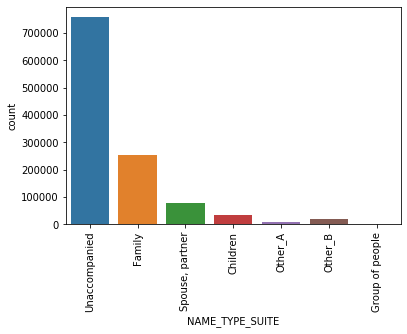

In [69]:
# Univariate analysis - Categorical data
sns.countplot(x='NAME_TYPE_SUITE',data=All_App)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

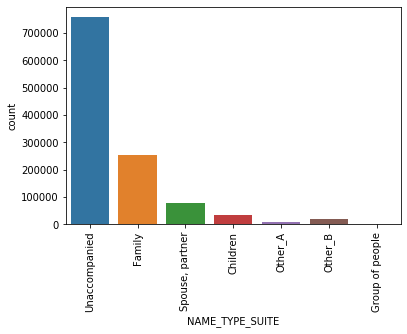

In [70]:
# Univariate analysis - Categorical data
sns.countplot(x='NAME_TYPE_SUITE',data=All_App)
plt.xticks(rotation=90)

#### Population who are unaccompanied has high number of approved loans compared to others who had company
#### The same set of people who are unaccompanied has high number of refused,cancelled and unused offers compared to others who had company
#### Number of Approved loans for unaccompanied people is much higher compared to other categories
#### Non-defaulted people have high number of approved loans compared to defaulted people

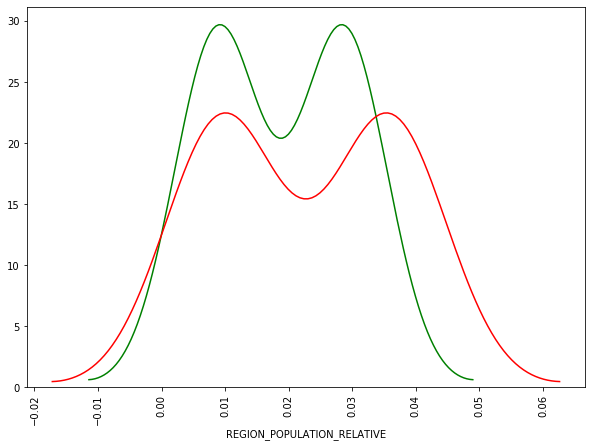

In [71]:
# Univariate analysis - Continuous data
plt.figure(figsize=(10,7))
sns.distplot(Stat_Approved['REGION_POPULATION_RELATIVE'].dropna(),hist=False,color='green')
sns.distplot(Stat_Canceled['REGION_POPULATION_RELATIVE'].dropna(),hist=False,color='orange')
sns.distplot(Stat_Refused['REGION_POPULATION_RELATIVE'].dropna(),hist=False,color='red')
sns.distplot(Stat_Unused_offer['REGION_POPULATION_RELATIVE'].dropna(),hist=False,color='blue')
plt.xticks(rotation=90)
plt.show()

#### As we can observe from the above plot client with Status as approved are lesser at highly densed population region as compared to client with status as refused

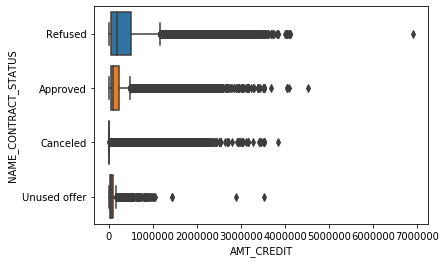

In [72]:
# Bivariate anaysis Continuous - Categorical plot
#plt.figure(figsize=(15,10))
sns.boxplot(x='AMT_CREDIT',y ='NAME_CONTRACT_STATUS',data=All_App)
plt.show()

#### Loan status is Refused  for the clients who have high credit amount of the loan as compared to Approval, Cancellation and Unused offers

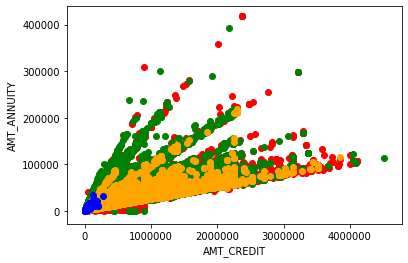

In [73]:
# Continuous - Continuous plot
plt.scatter(Stat_Refused['AMT_CREDIT'],y=Stat_Refused['AMT_ANNUITY'],color='red')
plt.scatter(Stat_Approved['AMT_CREDIT'],y=Stat_Approved['AMT_ANNUITY'],color='green')
plt.scatter(Stat_Canceled['AMT_CREDIT'],y=Stat_Canceled['AMT_ANNUITY'],color='orange')
plt.scatter(Stat_Unused_offer['AMT_CREDIT'],y=Stat_Unused_offer['AMT_ANNUITY'],color='blue')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()



#### Loan annuity growth is proportional to credit amount of the loan in majority of the cases where the loan is approved, refused and cancelled. 
#### Loan annuity for unused offers has a very small amount for credit

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

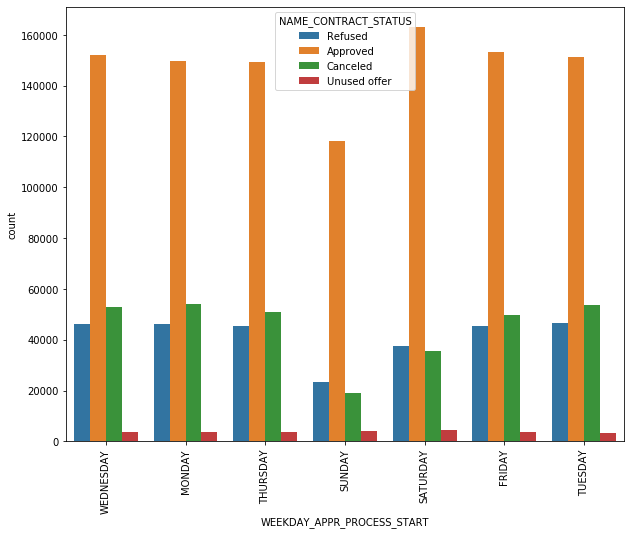

In [74]:
#Categorical - Categorical analysis

plt.figure(figsize=(10,8))
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',hue ='NAME_CONTRACT_STATUS',data = All_App)
plt.xticks(rotation=90)

#### Approved cases are more in number on Saturday compared to all other days.
#### More number of loans were canceled on Monday and Tuesday.
#### On Saturday and Sunday, lesser number of loans were refused compared to other days.
#### On all days number of unused offers were constantly the same. 